In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# import warnings; warnings.simplefilter('ignore', FutureWarning)
# import tensorflow as tf
# tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from hyperopt.mongoexp import MongoTrials
from vastai.api import VastClient
import json
from matplotlib import pyplot as plt
from toolbench.tools import print_module_versions
print_module_versions(globals())

             IPython  {'7.9.0'}
            hyperopt  {'0.2.2'}
                json  {'2.0.9'}
          matplotlib  {'3.1.1'}
           toolbench  {'0.0.1'}


In [3]:
vast = VastClient().authenticate()

Initializing vast.ai client with api_key from /home/sam/.vast_api_key.


In [4]:
instance = vast.get_running_instances()[0]
instance.start().wait_until_running()
remote = instance.pb_remote

Starting instance 405882.


In [5]:
instance.ssh_connection_command

'ssh root@ssh5.vast.ai -p 15882 -i /home/sam/.ssh/vastai'

In [6]:
tunnel = instance.get_tunnel(27018, 27017)

In [7]:
# trials.delete_all()
trials = MongoTrials('mongo://localhost:27018/avian_vocalizations/jobs', exp_key='foo')

In [8]:
trial = trials.best_trial
trial['misc']['vals']

SON([('batch_size', [1]), ('dropout', [0.15177680060450627])])

In [9]:
trial['result']['scores']

[SON([('loss', 3.5119876861572266), ('accuracy', 0.1328125), ('argmin_loss', 87)]),
 SON([('loss', 3.8404088020324707), ('accuracy', 0.083984375), ('argmin_loss', 71)])]

In [10]:
def plot_split(i):
    scores=trial['result']['scores'][i]
    argmin_loss = scores['argmin_loss']
    accuracy = scores['accuracy']
    m=json.loads(trials.trial_attachments(trial)['metrics.split%i'%i])
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(12,3))
    plt.tight_layout()
    plt.rcParams['lines.linewidth']=1
    
    ax0.set_title("Split %i Accuracy"%i)
    ax0.plot(m['accuracy'],'.',label='accuracy')
    ax0.plot(m['val_accuracy'],'.',label='val_accuracy')
    ax0.vlines(argmin_loss, *ax0.get_ylim(), colors='m')
    ax0.hlines(accuracy, *ax0.get_xlim(), colors='m')
    ax0.set_xlabel('epoch')
    
    ax1.set_title("Split %i Loss"%i)
    ax1.plot(m['loss'],'.',label='loss')
    ax1.plot(m['val_loss'],'.',label='val_loss')
    ax1.vlines(argmin_loss, *ax1.get_ylim(), colors='m')
    ax1.hlines(scores['loss'], *ax1.get_xlim(), colors='m')
    ax1.set_xlabel('epoch')
    
    fig.show()

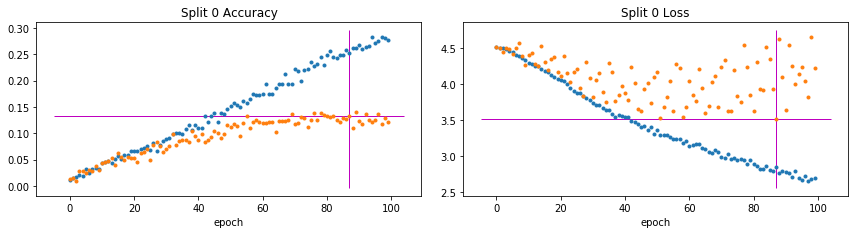

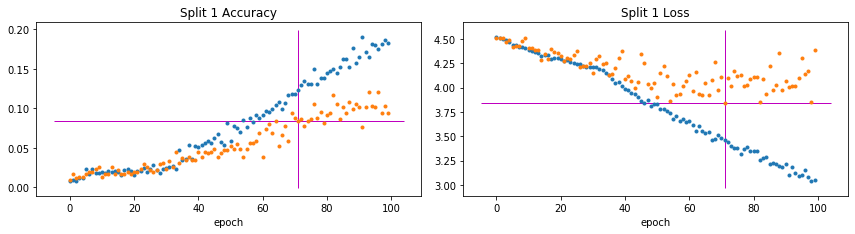

In [11]:
for i in range(len(trial['result']['scores'])):
    plot_split(i)

In [12]:
# trials.delete_all()

## Cleanup

In [13]:
tunnel.close()

In [14]:
# instance.stop()